In [2]:
import os
import sys
import numpy as np
from sklearn.linear_model import LinearRegression

root_path = os.path.abspath("..")  
if root_path not in sys.path:
    sys.path.insert(0, root_path)
os.chdir("..")

In [3]:
from data.loader import load_complete_dataset
from data.preprocessing import add_module_columns

dataset = load_complete_dataset()
add_module_columns(dataset)

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,actitivy_label,participant_id,magnetometer_module,gyroscope_module,accelerometer_module
0,1.0,-2.82430,9.1773,2.2388,-1.43340,-0.003309,-0.41384,-0.85484,0.50402,0.674830,1735.1,1.0,14,1.200076,1.491948,9.859601
1,1.0,-2.80020,9.1655,2.2507,-1.04340,0.230960,-0.12186,-0.85887,0.52610,0.674830,1754.6,1.0,14,1.212367,1.075582,9.844448
2,1.0,-2.78810,9.1296,2.2634,-1.12080,0.215210,-0.10277,-0.85081,0.52811,0.683740,1774.2,1.0,14,1.212550,1.145893,9.810509
3,1.0,-2.82400,9.1173,2.2522,-1.15170,0.143390,0.32778,-0.84879,0.50402,0.688200,1793.7,1.0,14,1.203370,1.205991,9.806760
4,1.0,-2.82400,9.1414,2.2517,-1.36180,-0.113230,0.65311,-0.86290,0.51807,0.683740,1813.2,1.0,14,1.216755,1.514554,9.829055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53114,5.0,-0.48220,9.4431,-2.1914,0.70696,-0.734460,1.05760,-0.13535,0.71257,0.069565,1038000.0,1.0,0,0.728639,1.468925,9.706023
53115,5.0,-0.47013,9.4553,-2.1919,0.23155,-0.340820,0.98911,-0.12525,0.67265,0.071739,1038000.0,1.0,0,0.687962,1.071500,9.717415
53116,5.0,-0.49463,9.4428,-2.2155,0.53524,-0.291600,1.00350,-0.11919,0.69461,0.071739,1038000.0,1.0,0,0.708404,1.174106,9.711826
53117,5.0,-0.47013,9.4553,-2.1919,0.23140,-0.326390,0.89815,-0.11313,0.72056,0.084783,1038100.0,1.0,0,0.734298,0.983234,9.717415


In [4]:
def create_sliding_window(data, window_size):
    """Cria janelas deslizantes para séries temporais"""
    assert isinstance(data, np.ndarray), "Erro: 'data' deve ser um numpy.ndarray."
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y).reshape(-1, 1)

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

def gcv_linear_regression(X, y):
    n, p = X.shape
    
    model = LinearRegression(fit_intercept=True) # Default
    model.fit(X, y)
    
    y_pred = model.predict(X)
    residuals = y.flatten() - y_pred.flatten()
    rss = np.sum(residuals**2)
    hat_matrix_trace = p + 1 
    

    mse = rss / n
    denominator = (1 - hat_matrix_trace / n) ** 2
    
    gcv = mse / denominator

    return gcv, model

In [7]:
from config.constants import DEVICES


sensor1 = dataset.loc[
    (dataset["device_id"] == DEVICES[0]) & (dataset["actitivy_label"] == 0),
    "accelerometer_module"
].to_numpy()
sensor1original=sensor1.copy()



array([], dtype=float64)

In [8]:
def create_sliding_window(data, p):
    assert isinstance(data, np.ndarray), "Erro: 'data' deve ser um numpy.ndarray."
    X, y = [], []
    for i in range(len(data) - p):
        X.append(data[i:i+p])
        y.append(data[i+p])
    return np.array(X), np.array(y).reshape(-1, 1)

In [9]:
def split_data_temporal(X, test_size=0.3):
    split_point = int(len(X) * (1 - test_size))
    X_train = X[:split_point]
    X_test = X[split_point:]
    return X_train, X_test

### treinar o modelo para a melhor janela

In [23]:
dataset["accelerometer_module"].describe()

count    3.930798e+06
mean     1.018755e+01
std      1.956564e+00
min      1.976353e-01
25%      9.721089e+00
50%      9.914280e+00
75%      1.017855e+01
max      4.299262e+01
Name: accelerometer_module, dtype: float64


--- A testar janelas (p=1 até 300) nos dados escalados ---
Melhor janela (p): 136
Menor GCV Score: 2.387967

PERFORMANCE REAL 
MSE (Escalado): 2.310224
R2 Score: 0.7048


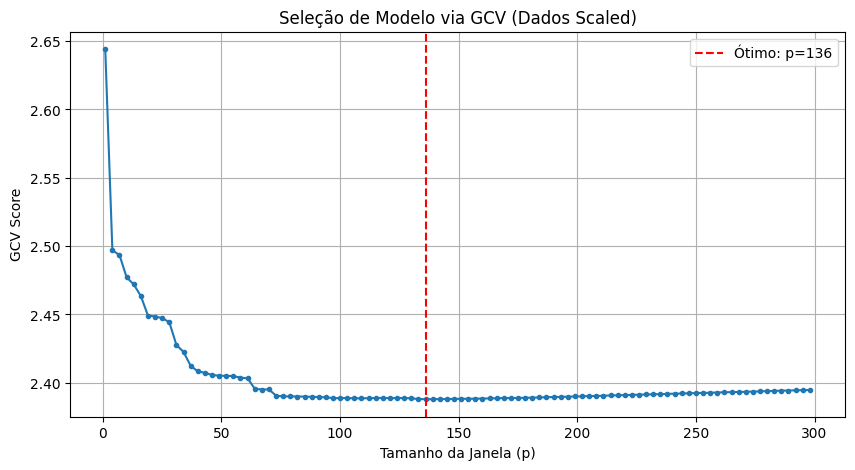

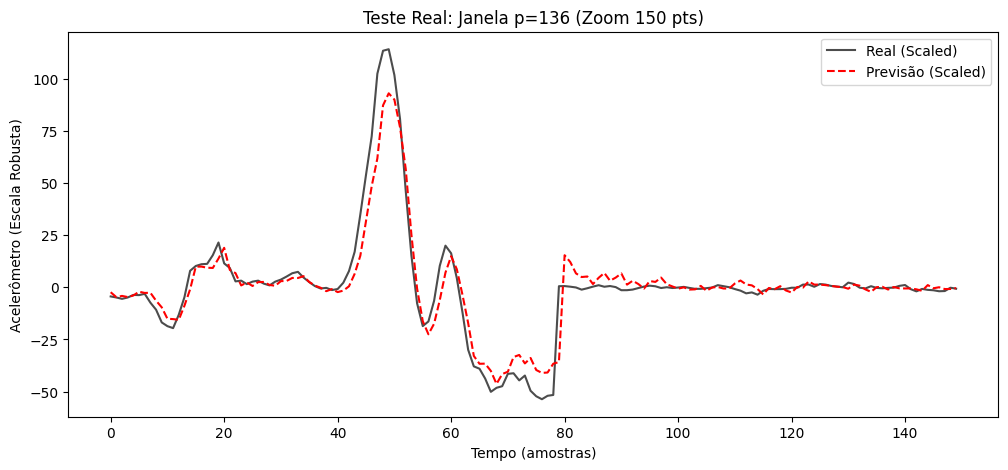

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler # <--- NOVO IMPORT

# ==========================================
# 1. FUNÇÕES AUXILIARES
# ==========================================

def create_sliding_window(data, p):
    """
    Cria a matriz X (lags) e o vetor y (target) para série temporal.
    Esperamos que 'data' seja um array 1D (flattened).
    """
    n = len(data) - p
    if n <= 0:
        raise ValueError(f"Dados insuficientes ({len(data)}) para janela p={p}")
        
    X = np.zeros((n, p))
    y = np.zeros(n)
    
    for i in range(n):
        X[i] = data[i : i + p]  # Os p valores anteriores
        y[i] = data[i + p]      # O valor atual (target)
        
    return X, y

def gcv_linear_regression(X, y):
    """
    Calcula o score GCV para Regressão Linear (OLS).
    """
    n, p_dim = X.shape
    
    # Ajustar modelo
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    
    # Calcular RSS (Residual Sum of Squares)
    y_pred = model.predict(X)
    residuals = y - y_pred
    rss = np.sum(residuals**2)
    
    # Degrees of Freedom (Trace da Matriz Hat)
    hat_trace = p_dim + 1
    
    # Fórmula GCV: MSE / (1 - trace/n)^2
    mse = rss / n
    denominator = (1 - hat_trace / n) ** 2
    
    if denominator <= 0:
        return np.inf, model
        
    gcv = mse / denominator
    return gcv, model




# Filtrar dados (Assumindo que dataset e DEVICES existem)
data_series = dataset.loc[
    (dataset["device_id"] == DEVICES[0]) & (dataset["actitivy_label"] == 1),
    "accelerometer_module"
].copy() 


split_point = int(len(data_series) * 0.7)
raw_train = data_series[:split_point].to_numpy()
raw_test = data_series[split_point:].to_numpy()




scaler = RobustScaler()
train_scaled = scaler.fit_transform(raw_train.reshape(-1, 1)).flatten()

test_scaled = scaler.transform(raw_test.reshape(-1, 1)).flatten()

# ==========================================
# 3. LOOP DE SELEÇÃO (GCV)
# ==========================================

gcv_scores = []
valid_p = [] 
max_p = range(1, 301, 3)

print(f"\n--- A testar janelas (p=1 até 300) nos dados escalados ---")

for p in max_p:
    # Verificação de segurança
    if len(train_scaled) <= p + 5:
        print(f"Parando loop em p={p}: dados insuficientes.")
        break

    try:
        # IMPORTANTE: Usamos 'train_scaled' aqui, não 'raw_train'
        X_train_window, y_train_target = create_sliding_window(train_scaled, p)
        
        gcv, _ = gcv_linear_regression(X_train_window, y_train_target)
        
        gcv_scores.append(gcv)
        valid_p.append(p)
        
    except np.linalg.LinAlgError:
        print(f"Erro numérico em p={p}. Ignorado.")
        gcv_scores.append(np.inf)
        valid_p.append(p)
    except Exception as e:
        print(f"Erro inesperado em p={p}: {e}")

# ==========================================
# 4. AVALIAÇÃO DO VENCEDOR
# ==========================================

best_idx = np.argmin(gcv_scores)
optimal_window = valid_p[best_idx]
min_gcv = gcv_scores[best_idx]


print(f"Melhor janela (p): {optimal_window}")
print(f"Menor GCV Score: {min_gcv:.6f}")

# --- PROVA REAL (Usando dados escalados) ---

# 1. Treinar modelo final com TODO o treino escalado
X_final_train, y_final_train = create_sliding_window(train_scaled, optimal_window)
final_model = LinearRegression()
final_model.fit(X_final_train, y_final_train)

# 2. Testar nos dados virgens (Teste Escalado)
X_test_real, y_test_real = create_sliding_window(test_scaled, optimal_window)
y_pred_test = final_model.predict(X_test_real)

# Métricas Finais
mse_real = mean_squared_error(y_test_real, y_pred_test)
r2_real = r2_score(y_test_real, y_pred_test)

print(f"\nPERFORMANCE REAL ")
print(f"MSE (Escalado): {mse_real:.6f}")
print(f"R2 Score: {r2_real:.4f}")



# Gráfico 1: Curva do GCV
plt.figure(figsize=(10, 5))
plt.plot(valid_p, gcv_scores, marker='o', markersize=3)
plt.axvline(optimal_window, color='r', linestyle='--', label=f'Ótimo: p={optimal_window}')
plt.xlabel("Tamanho da Janela (p)")
plt.ylabel("GCV Score")
plt.title("Seleção de Modelo via GCV (Dados Scaled)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 5))
zoom_slice = slice(0, 150) 

plt.plot(y_test_real[zoom_slice], label="Real (Scaled)", color='black', alpha=0.7)
plt.plot(y_pred_test[zoom_slice], label="Previsão (Scaled)", color='red', linestyle='--')
plt.xlabel("Tempo (amostras)")
plt.ylabel("Acelerômetro (Escala Robusta)")
plt.title(f"Teste Real: Janela p={optimal_window} (Zoom 150 pts)")
plt.legend()
plt.show()

inside
Density of outliers: 0.7299570250652849% | Desired outliers: 10%
Final outlier density: 9.999383134908395%


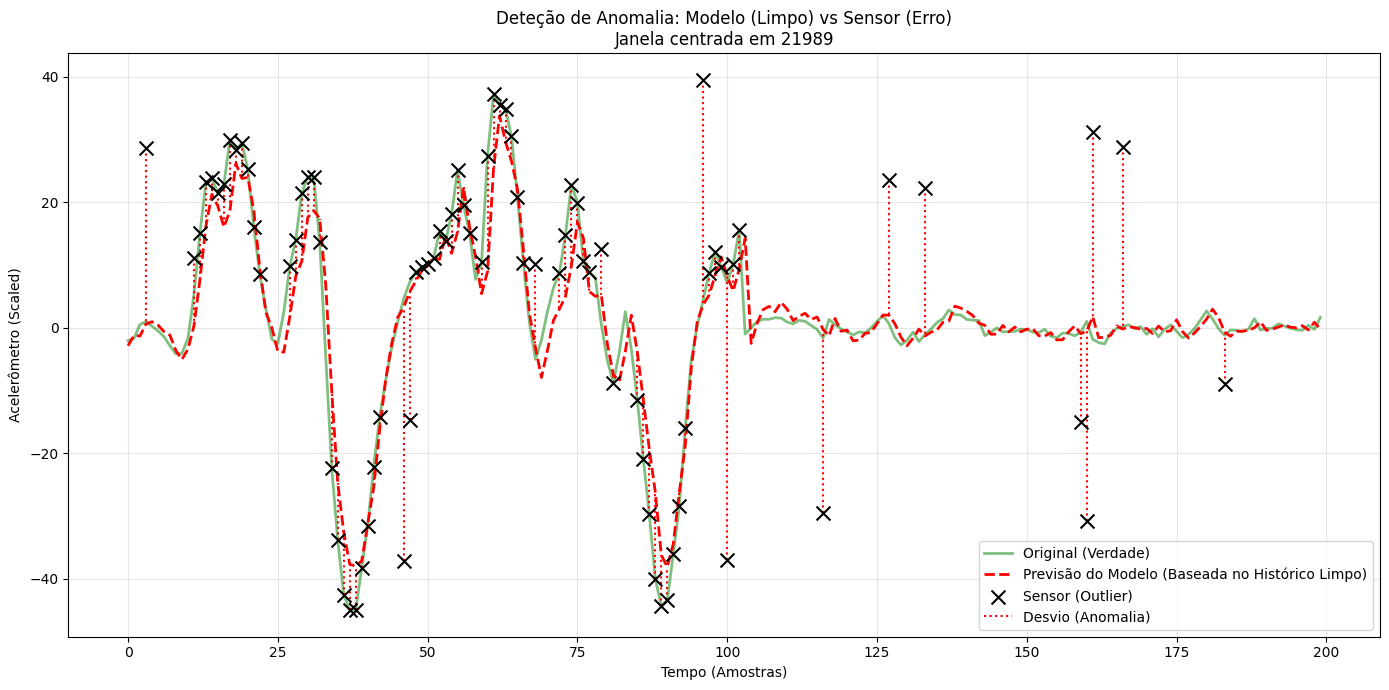

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from utils.outliers import inject_outliers


mask_2d, raw_noisy_2d = inject_outliers(raw_test, x=10, k=3, z=0.5)

# Flatten (Converter para 1D para facilitar)
raw_clean = raw_test.flatten()
raw_noisy = raw_noisy_2d.flatten()
mask_outliers = mask_2d.flatten() # <--- Aqui está a mask_outliers

# B. Scaling (Aplicar o RobustScaler já treinado)
clean_scaled = scaler.transform(raw_clean.reshape(-1, 1)).flatten() # <--- Aqui está o clean_scaled
noisy_scaled = scaler.transform(raw_noisy.reshape(-1, 1)).flatten() # <--- Aqui está o noisy_scaled


X_clean_test, y_clean_target = create_sliding_window(clean_scaled, optimal_window)


_, y_noisy_target = create_sliding_window(noisy_scaled, optimal_window)


y_pred_ideal = final_model.predict(X_clean_test)


mask_aligned = mask_outliers[optimal_window:]
indices_erros = np.where(mask_aligned)[0]

if len(indices_erros) > 0:
    # Escolher o pior erro para centrar o gráfico
    diferencas = np.abs(y_noisy_target[indices_erros] - y_clean_target[indices_erros])
    idx_centro = indices_erros[np.argmax(diferencas)]
    
    # Janela de Zoom (100 pontos para cada lado)
    raio = 100
    inicio = max(0, idx_centro - raio)
    fim = min(len(y_pred_ideal), idx_centro + raio)
    
    # Recortes
    slice_clean = y_clean_target[inicio:fim]
    slice_noisy = y_noisy_target[inicio:fim]
    slice_pred  = y_pred_ideal[inicio:fim]  # Previsão baseada em dados limpos
    slice_mask  = mask_aligned[inicio:fim]
    
    # Eixo X local
    eixo_x = np.arange(len(slice_clean))
    
    # Identificar pontos de erro neste slice
    indices_locais = np.where(slice_mask)[0]
    
    # ==========================================
    # PLOT
    # ==========================================
    plt.figure(figsize=(14, 7))
    
    # A. A REALIDADE (Verde)
    plt.plot(eixo_x, slice_clean, color='green', label='Original (Verdade)', linewidth=2, alpha=0.5)
    
    # B. A PREVISÃO DO MODELO (Vermelho)
    # Como o input é limpo, esta linha deve seguir a verde muito de perto
    plt.plot(eixo_x, slice_pred, color='red', label='Previsão do Modelo (Baseada no Histórico Limpo)', linewidth=2, linestyle='--')
    
    # C. O SENSOR COM DEFEITO (Apenas os pontos outliers)
    if len(indices_locais) > 0:
        # X Preto: Onde o sensor foi parar
        plt.scatter(eixo_x[indices_locais], slice_noisy[indices_locais], 
                    color='black', marker='x', s=100, zorder=10, label='Sensor (Outlier)')
        
        # Linha Vermelha Vertical: A discrepância (Resíduo)
        # Mostra a distância entre o que o modelo esperava (Vermelho) e o que o sensor deu (Preto)
        plt.vlines(eixo_x[indices_locais], slice_noisy[indices_locais], slice_pred[indices_locais], 
                   colors='red', linestyles=':', label='Desvio (Anomalia)')

    plt.title(f"Deteção de Anomalia: Modelo (Limpo) vs Sensor (Erro)\nJanela centrada em {idx_centro}")
    plt.xlabel("Tempo (Amostras)")
    plt.ylabel("Acelerômetro (Scaled)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print numérico
    if len(indices_locais) > 0:
        idx_pico = indices_locais[np.argmax(np.abs(slice_noisy[indices_locais] - slice_clean[indices_locais]))]
        val_esperado = slice_pred[idx_pico]
        val_sensor = slice_noisy[idx_pico]
        desvio = abs(val_sensor - val_esperado)
        



--- HISTOGRAMA LIMPO (Matplotlib) ---


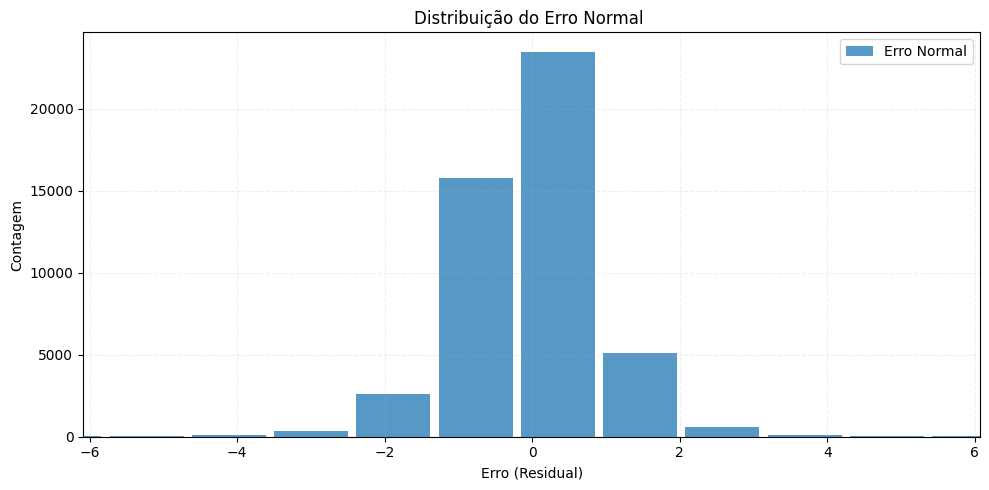

Visualização focada no intervalo: [-6.09, 6.07]


In [29]:
import matplotlib.pyplot as plt
import numpy as np

print("--- HISTOGRAMA LIMPO (Matplotlib) ---")

# 1. CALCULAR OS RESÍDUOS
residuals = y_clean_target - y_pred_ideal

# Calcular estatísticas apenas para definir o zoom
media = np.mean(residuals)
std = np.std(residuals)

# 2. PLOT
plt.figure(figsize=(10, 5))

# Histograma
# bins=100: Garante boa resolução
# rwidth=0.9: Dá um pequeno espaço entre as barras para leitura fácil
plt.hist(residuals, bins=100, color='#1f77b4', alpha=0.75, rwidth=0.9, label='Erro Normal')

# 3. DIMINUIR O EIXO X (ZOOM NA DISTRIBUIÇÃO)
# Focamos em +/- 4 vezes o desvio padrão. 
# Isto corta o espaço vazio nas pontas.
limite_zoom = 4 * std
plt.xlim(media - limite_zoom, media + limite_zoom)

# Decoração Simples
plt.title("Distribuição do Erro Normal ")
plt.xlabel("Erro (Residual)")
plt.ylabel("Contagem")
plt.grid(True, alpha=0.2, linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Visualização focada no intervalo: [{media - limite_zoom:.2f}, {media + limite_zoom:.2f}]")